In [1]:
# import modules
import numpy as np 
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
# generate synthetic data for linear regression
# set random seed
np.random.seed(9)
# draw 100 random numbers from uniform dist [0, 1]
x = np.random.uniform(0, 1, (100, 1))
# draw random noise from standard normal
z = np.random.normal(0, .1, (100, 1))
# create ground truth for y = 3x - 1
y = 3 * x - 1 + z

In [3]:
# split data into train and test
x_train, y_train = x[:80], y[:80]
x_val, y_val = x[80:], y[80:]

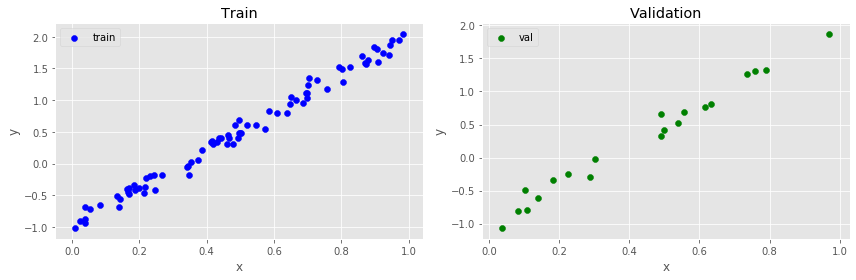

In [4]:
# visualize
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].scatter(x_train, y_train, label='train', color='b')
axes[0].set_title('Train')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].legend()
axes[1].scatter(x_val, y_val, label='val', color='g')
axes[1].set_title('Validation')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].legend()
fig.tight_layout()

In [5]:
# create trainable parameters for the model
weight = np.random.randn(1)
bias = np.random.randn(1)

print("model with weight = {} and bias = {}".format(weight, bias))

model with weight = [-1.03600638] and bias = [-0.13392398]


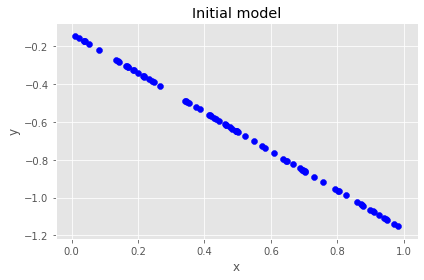

In [6]:
# let's predict y value for the training data using initial model
y_hats = [bias + weight * x for x in x_train]

# let's visualize the initial model
plt.scatter(x_train, y_hats, color='b')
plt.title('Initial model')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()

In [7]:
# set training routine
lr = 1e-1
n_epochs = 500

# keep records
losses = []
val_losses = []
# train model
for epoch in range(n_epochs):
    print("[ epoch ]", epoch)
    # forward pass
    yhat = bias + weight * x_train
    # calculate the error
    error = (y_train - yhat)
    # calcuate loss function
    loss = (error ** 2).mean()
    losses.append(loss)
    print("[ training ] training loss = {}".format(loss))
    # calcuate the gradients for model's trainable parameters
    bias_grad = -2 * error.mean()
    weight_grad = -2 * (x_train * error).mean()
    # perform gradient descend
    bias = bias - lr * bias_grad
    weight = weight - lr * weight_grad

    # calculate validation loss
    yhat = bias + weight * x_val
    error = (y_val - yhat)
    val_loss = (error ** 2).mean()
    val_losses.append(val_loss)
    print("[ eval ] validation loss = {}".format(val_loss))

print("linear.weight = {}, linear.bias = {}".format(weight, bias))

[ epoch ] 0
[ training ] training loss = 2.597726115899937
[ eval ] validation loss = 1.375413235408303
[ epoch ] 1
[ training ] training loss = 1.8688078845503946
[ eval ] validation loss = 1.1049772689470871
[ epoch ] 2
[ training ] training loss = 1.4503556602539411
[ eval ] validation loss = 0.9661782078666621
[ epoch ] 3
[ training ] training loss = 1.2059947041649455
[ eval ] validation loss = 0.8953715110373667
[ epoch ] 4
[ training ] training loss = 1.0593615774350043
[ eval ] validation loss = 0.8584675685386998
[ epoch ] 5
[ training ] training loss = 0.9676936350335964
[ eval ] validation loss = 0.8375215048675599
[ epoch ] 6
[ training ] training loss = 0.9070416460492211
[ eval ] validation loss = 0.8233296136000885
[ epoch ] 7
[ training ] training loss = 0.8639902612112476
[ eval ] validation loss = 0.8113616647777937
[ epoch ] 8
[ training ] training loss = 0.8310222569826362
[ eval ] validation loss = 0.7995408058920381
[ epoch ] 9
[ training ] training loss = 0.80392

[ eval ] validation loss = 0.013393066806640166
[ epoch ] 384
[ training ] training loss = 0.008668660488528105
[ eval ] validation loss = 0.013388986146942072
[ epoch ] 385
[ training ] training loss = 0.00866725706124864
[ eval ] validation loss = 0.013384974920503428
[ epoch ] 386
[ training ] training loss = 0.00866588893773588
[ eval ] validation loss = 0.013381031801161925
[ epoch ] 387
[ training ] training loss = 0.008664555229909655
[ eval ] validation loss = 0.013377155490793366
[ epoch ] 388
[ training ] training loss = 0.008663255072029794
[ eval ] validation loss = 0.013373344718673602
[ epoch ] 389
[ training ] training loss = 0.008661987620134162
[ eval ] validation loss = 0.01336959824085589
[ epoch ] 390
[ training ] training loss = 0.00866075205149083
[ eval ] validation loss = 0.013365914839562888
[ epoch ] 391
[ training ] training loss = 0.008659547564064013
[ eval ] validation loss = 0.013362293322593245
[ epoch ] 392
[ training ] training loss = 0.008658373375993

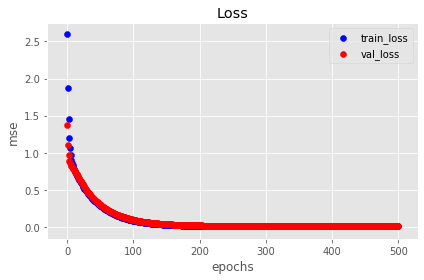

In [8]:
# visualize the loss during gradient descent
plt.scatter(range(n_epochs), losses, label='train_loss', color='b')
plt.scatter(range(n_epochs), val_losses, label='val_loss', color='r')
plt.legend()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('mse')
plt.tight_layout()

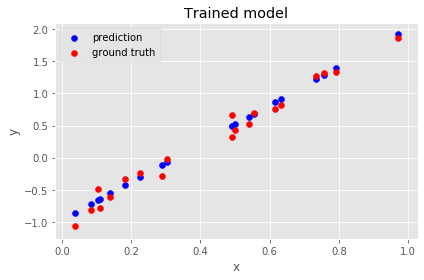

In [9]:
# let's predict y value for the validation data using the trained model
y_hats = [bias + weight * x for x in x_val]

# let's visualize the intial model
plt.scatter(x_val, y_hats, label='prediction', color='b')
plt.scatter(x_val, y_val, label='ground truth', color='r')
plt.legend()
plt.title('Trained model')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()